# KNN Classification

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [11]:
df_real = pd.read_csv('../data/data_real.csv')
df_fake = pd.read_csv('../data/data_fake.csv')

In [12]:
df_real.head()

,profile_pic,biography,follows_count,followed_by_count,ff_ratio,media_count,is_private,is_verified,is_business_account,is_joined_recently,...,std_comments,var_comments,skw_comments,mean_time_between_posts,max_time_between_posts,min_time_between_posts,std_time_between_posts,var_time_between_posts,skw_time_between_posts,real_account
0,True,False,1128,575,0.509300,322,False,False,False,False,...,1.527525,2.333333,1.131088,1.491866e+06,7517421.0,5.0,1.832700e+06,3.358789e+12,1.797422,True
1,True,True,430,353,0.819026,3,False,False,True,False,...,9.237604,85.333333,0.707107,5.472764e+06,6023604.0,4921924.0,7.790054e+05,6.068494e+11,0.000000,True
2,True,True,418,534,1.274463,139,False,False,False,False,...,7.131620,50.860000,0.321661,3.611337e+06,10774210.0,164203.0,3.163705e+06,1.000903e+13,1.065019,True
3,True,True,1425,3118,2.186536,206,False,False,True,False,...,11.146449,124.243333,0.682247,1.338888e+06,4057835.0,233556.0,1.025556e+06,1.051766e+12,0.939111,True
4,True,True,953,288,0.301887,458,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [13]:
df_fake.head()

,profile_pic,biography,follows_count,followed_by_count,ff_ratio,media_count,is_private,is_verified,is_business_account,is_joined_recently,...,std_comments,var_comments,skw_comments,mean_time_between_posts,max_time_between_posts,min_time_between_posts,std_time_between_posts,var_time_between_posts,skw_time_between_posts,real_account
0,True,True,2321,747,0.321705,10,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,True,True,4247,611,0.143832,99,False,False,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,True,True,781,338,0.432225,128,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,True,True,1764,1613,0.913881,64,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,True,False,68,65,0.942029,1,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [14]:
df=pd.concat([df_real,df_fake],ignore_index=True)

In [15]:
print(df)

       profile_pic  biography  follows_count  followed_by_count  ff_ratio  \
0             True      False           1128                575  0.509300   
1             True       True            430                353  0.819026   
2             True       True            418                534  1.274463   
3             True       True           1425               3118  2.186536   
4             True       True            953                288  0.301887   
...            ...        ...            ...                ...       ...   
17482         True       True           2323                 72  0.030981   
17483         True       True           2311               2934  1.269031   
17484         True       True           7498               2340  0.312042   
17485         True      False           6321                327  0.051724   
17486         True       True           6531                 61  0.009339   

       media_count  is_private  is_verified  is_business_account  \
0      

In [17]:
features_columns=list(df.columns[:30])
# targets_column=list(df.columns[30:31])
# df.head()
print(features_columns)

['profile_pic', 'biography', 'follows_count', 'followed_by_count', 'ff_ratio', 'media_count', 'is_private', 'is_verified', 'is_business_account', 'is_joined_recently', 'highlight_reel_count', 'connected_fb_page', 'average_likes', 'max_likes', 'min_likes', 'std_likes', 'var_likes', 'skw_likes', 'average_comments', 'max_comments', 'min_comments', 'std_comments', 'var_comments', 'skw_comments', 'mean_time_between_posts', 'max_time_between_posts', 'min_time_between_posts', 'std_time_between_posts', 'var_time_between_posts', 'skw_time_between_posts']


In [18]:
df.shape

(17487, 31)

In [20]:
targets = df['real_account'].values
df=df.loc[:,'profile_pic':'highlight_reel_count']

In [21]:
targets

array([ True,  True,  True, ..., False, False, False])

In [22]:
# df.drop('real_account', axis=1, inplace=True)

In [23]:
df.head()

,profile_pic,biography,follows_count,followed_by_count,ff_ratio,media_count,is_private,is_verified,is_business_account,is_joined_recently,highlight_reel_count
0,True,False,1128,575,0.509300,322,False,False,False,False,3
1,True,True,430,353,0.819026,3,False,False,True,False,3
2,True,True,418,534,1.274463,139,False,False,False,False,3
3,True,True,1425,3118,2.186536,206,False,False,True,False,0
4,True,True,953,288,0.301887,458,True,False,False,False,0


In [24]:
df_sc = StandardScaler().fit_transform(df)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(df_sc, targets, test_size = 0.2, random_state = 12345)

In [43]:
knn = KNeighborsClassifier()

In [44]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [45]:
knn_pred = knn.predict(x_test)

In [46]:
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
print(confusion_matrix(y_test, knn_pred))

[[1243  387]
 [ 290 1578]]


In [48]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

       False       0.81      0.76      0.79      1630
        True       0.80      0.84      0.82      1868

    accuracy                           0.81      3498
   macro avg       0.81      0.80      0.80      3498
weighted avg       0.81      0.81      0.81      3498



In [59]:
err = []

for i in range(1, 30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    err.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Tasso di errore')

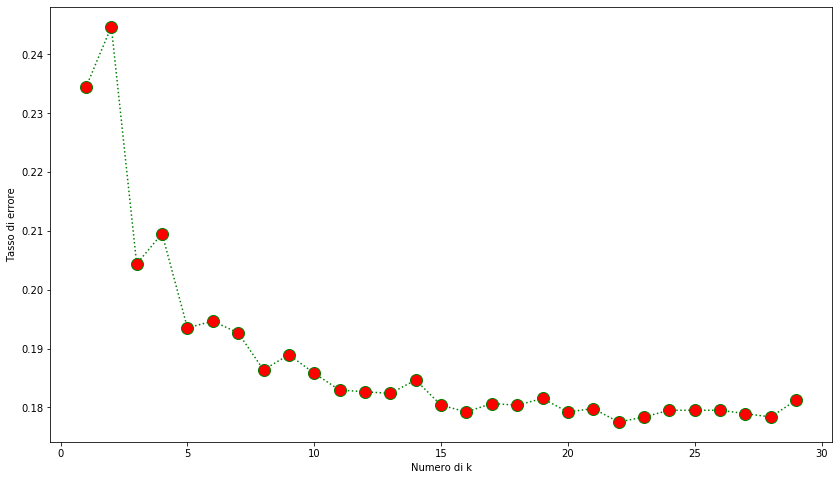

In [60]:
plt.figure(figsize=(14, 8))
plt.plot(range(1, 30), err, color='green', linestyle='dotted', marker='o',
         markerfacecolor='red', markersize=12)
plt.xlabel('Numero di k')
plt.ylabel('Tasso di errore')

In [73]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

[[1264  366]
 [ 274 1594]]
              precision    recall  f1-score   support

       False       0.82      0.78      0.80      1630
        True       0.81      0.85      0.83      1868

    accuracy                           0.82      3498
   macro avg       0.82      0.81      0.82      3498
weighted avg       0.82      0.82      0.82      3498

